# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import sys
sys.executable

'C:\\Users\\aasha\\anaconda3\\envs\\tfgpu\\python.exe'

In [2]:
import tensorflow as tf

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [6]:
import pandas as pd
import cv2 

import os
import numpy as np

import time

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

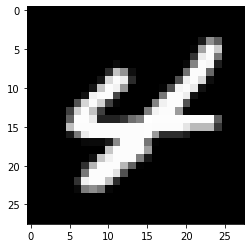

In [8]:
train=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Digits_MNIST\\Train\\train.csv")
test=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Digits_MNIST\\Test.csv")

train_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Digits_MNIST\\Train\\Images\\train\\"

##Loading Training Images
train_img=[]
for i in train['filename']:
    img=cv2.imread(os.path.join(train_image_path,i))
    train_img.append(img)

plt.imshow(train_img[0])

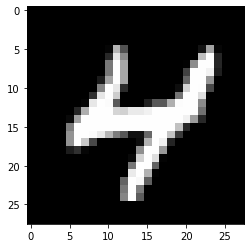

In [9]:
test_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Digits_MNIST\\Train\\Images\\test\\"

##Loading Testing Images
test_img=[]
for i in test['filename']:
    img=cv2.imread(os.path.join(test_image_path,i))
    test_img.append(img)

plt.imshow(test_img[0])

In [10]:
train_label = train['label']

In [11]:
X_train = np.array(train_img)
X_test_sub = np.array(test_img)

In [12]:
X_train.shape, X_test_sub.shape

((49000, 28, 28, 3), (21000, 28, 28, 3))

In [13]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(train_label)

In [14]:
print(X_train.shape, X_test_sub.shape, y_train.shape)

(49000, 28, 28, 3) (21000, 28, 28, 3) (49000, 10)


## Best CNN expected Model

In [15]:
def base_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(28,28,3)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [20]:
def get_model_cnn_batch():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
#99.3 in Analytics Vidya

In [27]:
def get_model_cnn_batch_02():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
#99.5

In [28]:
model = get_model_cnn_batch_02()

In [29]:
tensor_board = tf.keras.callbacks.TensorBoard('./logs/LeNet-MNIST-1')

In [30]:
X_train.shape, y_train.shape

((49000, 28, 28, 3), (49000, 10))

In [31]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 9s 258us/step - loss: 0.2483 - accuracy: 0.9307 - val_loss: 0.0711 - val_accuracy: 0.9793
Epoch 2/100
34300/34300 [==============================] - 7s 218us/step - loss: 0.0775 - accuracy: 0.9787 - val_loss: 0.0560 - val_accuracy: 0.9820
Epoch 3/100
34300/34300 [==============================] - 8s 224us/step - loss: 0.0542 - accuracy: 0.9849 - val_loss: 0.0444 - val_accuracy: 0.9863
Epoch 4/100
34300/34300 [==============================] - 8s 220us/step - loss: 0.0466 - accuracy: 0.9865 - val_loss: 0.0595 - val_accuracy: 0.9819
Epoch 5/100
34300/34300 [==============================] - 7s 216us/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 6/100
34300/34300 [==============================] - 7s 216us/step - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.0520 - val_accuracy: 0.9849
Epoch 7/100
34300/34300 [==============================]

34300/34300 [==============================] - 8s 220us/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0368 - val_accuracy: 0.9927
Epoch 56/100
34300/34300 [==============================] - 8s 220us/step - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.0351 - val_accuracy: 0.9931
Epoch 57/100
34300/34300 [==============================] - 8s 219us/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0316 - val_accuracy: 0.9933
Epoch 58/100
34300/34300 [==============================] - 8s 219us/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0385 - val_accuracy: 0.9918
Epoch 59/100
34300/34300 [==============================] - 8s 221us/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0330 - val_accuracy: 0.9933
Epoch 60/100
34300/34300 [==============================] - 8s 221us/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0352 - val_accuracy: 0.9918
Epoch 61/100
34300/34300 [==============================] - 8s 220us/step - loss: 0.0046 - accuracy: 0.9984 - val

In [32]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam11.csv', header =  ['filename', 'label' ], index = None)

In [33]:
def get_model_cnn_batch_03():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [34]:
model = get_model_cnn_batch_03()

In [35]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 10s 290us/step - loss: 0.8151 - accuracy: 0.7638 - val_loss: 0.1313 - val_accuracy: 0.9653
Epoch 2/100
34300/34300 [==============================] - 8s 240us/step - loss: 0.2035 - accuracy: 0.9517 - val_loss: 0.1234 - val_accuracy: 0.9628
Epoch 3/100
34300/34300 [==============================] - 8s 241us/step - loss: 0.1265 - accuracy: 0.9694 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 4/100
34300/34300 [==============================] - 8s 241us/step - loss: 0.0946 - accuracy: 0.9769 - val_loss: 0.0519 - val_accuracy: 0.9854
Epoch 5/100
34300/34300 [==============================] - 8s 241us/step - loss: 0.0771 - accuracy: 0.9813 - val_loss: 0.0440 - val_accuracy: 0.9875
Epoch 6/100
34300/34300 [==============================] - 8s 242us/step - loss: 0.0642 - accuracy: 0.9836 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 7/100
34300/34300 [==============================

34300/34300 [==============================] - 10s 294us/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0383 - val_accuracy: 0.9939
Epoch 56/100
34300/34300 [==============================] - 8s 243us/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0367 - val_accuracy: 0.9942
Epoch 57/100
34300/34300 [==============================] - 8s 245us/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0502 - val_accuracy: 0.9922
Epoch 58/100
34300/34300 [==============================] - 8s 243us/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.0408 - val_accuracy: 0.9931
Epoch 59/100
34300/34300 [==============================] - 8s 245us/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0403 - val_accuracy: 0.9941
Epoch 60/100
34300/34300 [==============================] - 8s 242us/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0451 - val_accuracy: 0.9937
Epoch 61/100
34300/34300 [==============================] - 8s 243us/step - loss: 0.0067 - accuracy: 0.9982 - va

In [36]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam13.csv', header =  ['filename', 'label' ], index = None)

In [37]:
def get_model_cnn_batch_04():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (2,2), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (2,2), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))    
        
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [38]:
model = get_model_cnn_batch_04()

In [39]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 9s 271us/step - loss: 1.9887 - accuracy: 0.3116 - val_loss: 1.1212 - val_accuracy: 0.7563
Epoch 2/100
34300/34300 [==============================] - 7s 217us/step - loss: 1.0336 - accuracy: 0.6706 - val_loss: 0.3087 - val_accuracy: 0.9493
Epoch 3/100
34300/34300 [==============================] - 7s 217us/step - loss: 0.5860 - accuracy: 0.8297 - val_loss: 0.1516 - val_accuracy: 0.9648
Epoch 4/100
34300/34300 [==============================] - 8s 219us/step - loss: 0.3919 - accuracy: 0.8952 - val_loss: 0.1394 - val_accuracy: 0.9652
Epoch 5/100
34300/34300 [==============================] - 7s 218us/step - loss: 0.2965 - accuracy: 0.9232 - val_loss: 0.0912 - val_accuracy: 0.9790
Epoch 6/100
34300/34300 [==============================] - 8s 232us/step - loss: 0.2442 - accuracy: 0.9363 - val_loss: 0.1080 - val_accuracy: 0.9752
Epoch 7/100
34300/34300 [==============================]

34300/34300 [==============================] - 8s 224us/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0879 - val_accuracy: 0.9907
Epoch 55/100
34300/34300 [==============================] - 8s 223us/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0956 - val_accuracy: 0.9899
Epoch 56/100
34300/34300 [==============================] - 8s 228us/step - loss: 0.0443 - accuracy: 0.9851 - val_loss: 0.0957 - val_accuracy: 0.9901
Epoch 57/100
34300/34300 [==============================] - 8s 224us/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0991 - val_accuracy: 0.9882
Epoch 58/100
34300/34300 [==============================] - 8s 227us/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.1133 - val_accuracy: 0.9874
Epoch 59/100
34300/34300 [==============================] - 8s 234us/step - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.1084 - val_accuracy: 0.9889
Epoch 60/100
34300/34300 [==============================] - 8s 241us/step - loss: 0.0487 - accuracy: 0.9854 - val

In [40]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam14.csv', header =  ['filename', 'label' ], index = None)

In [43]:
def get_model_cnn_batch_05():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (2,2), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (2,2), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))    

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [44]:
model = get_model_cnn_batch_05()

In [45]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/150
34300/34300 [==============================] - 8s 246us/step - loss: 1.2052 - accuracy: 0.6177 - val_loss: 0.2857 - val_accuracy: 0.9219
Epoch 2/150
34300/34300 [==============================] - 7s 212us/step - loss: 0.2946 - accuracy: 0.9327 - val_loss: 0.0968 - val_accuracy: 0.9722
Epoch 3/150
34300/34300 [==============================] - 7s 213us/step - loss: 0.1717 - accuracy: 0.9611 - val_loss: 0.0739 - val_accuracy: 0.9799
Epoch 4/150
34300/34300 [==============================] - 7s 213us/step - loss: 0.1245 - accuracy: 0.9719 - val_loss: 0.0636 - val_accuracy: 0.9837
Epoch 5/150
34300/34300 [==============================] - 7s 214us/step - loss: 0.0989 - accuracy: 0.9773 - val_loss: 0.0740 - val_accuracy: 0.9813
Epoch 6/150
34300/34300 [==============================] - 7s 214us/step - loss: 0.0814 - accuracy: 0.9813 - val_loss: 0.0837 - val_accuracy: 0.9797
Epoch 7/150
34300/34300 [==============================]

34300/34300 [==============================] - 8s 237us/step - loss: 0.0113 - accuracy: 0.9974 - val_loss: 0.1062 - val_accuracy: 0.9859
Epoch 56/150
34300/34300 [==============================] - 8s 236us/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0664 - val_accuracy: 0.9906
Epoch 57/150
34300/34300 [==============================] - 8s 235us/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0805 - val_accuracy: 0.9886
Epoch 58/150
34300/34300 [==============================] - 8s 237us/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.1348 - val_accuracy: 0.9841
Epoch 59/150
34300/34300 [==============================] - 8s 238us/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.0688 - val_accuracy: 0.9904
Epoch 60/150
34300/34300 [==============================] - 8s 236us/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0790 - val_accuracy: 0.9899
Epoch 61/150
34300/34300 [==============================] - 8s 237us/step - loss: 0.0036 - accuracy: 0.9992 - val

34300/34300 [==============================] - 8s 234us/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0939 - val_accuracy: 0.9904
Epoch 110/150
34300/34300 [==============================] - 8s 234us/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0944 - val_accuracy: 0.9895
Epoch 111/150
34300/34300 [==============================] - 8s 235us/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.1135 - val_accuracy: 0.9884
Epoch 112/150
34300/34300 [==============================] - 8s 232us/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0842 - val_accuracy: 0.9902
Epoch 113/150
34300/34300 [==============================] - 8s 233us/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0811 - val_accuracy: 0.9915
Epoch 114/150
34300/34300 [==============================] - 8s 229us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0937 - val_accuracy: 0.9898
Epoch 115/150
34300/34300 [==============================] - 8s 234us/step - loss: 0.0062 - accuracy: 0.9985

In [46]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam15.csv', header =  ['filename', 'label' ], index = None)

In [47]:
def get_model_cnn_batch_06():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))    
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [48]:
model = get_model_cnn_batch_06()

In [49]:
%%time
model.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/150
34300/34300 [==============================] - 11s 320us/step - loss: 1.8130 - accuracy: 0.3831 - val_loss: 0.6084 - val_accuracy: 0.9204
Epoch 2/150
34300/34300 [==============================] - 9s 260us/step - loss: 0.8013 - accuracy: 0.7588 - val_loss: 0.1801 - val_accuracy: 0.9683
Epoch 3/150
34300/34300 [==============================] - 9s 261us/step - loss: 0.4592 - accuracy: 0.8711 - val_loss: 0.0946 - val_accuracy: 0.9767
Epoch 4/150
34300/34300 [==============================] - 9s 265us/step - loss: 0.3352 - accuracy: 0.9063 - val_loss: 0.1215 - val_accuracy: 0.9694
Epoch 5/150
34300/34300 [==============================] - 9s 263us/step - loss: 0.2561 - accuracy: 0.9316 - val_loss: 0.1154 - val_accuracy: 0.9693
Epoch 6/150
34300/34300 [==============================] - 9s 265us/step - loss: 0.2160 - accuracy: 0.9407 - val_loss: 0.1041 - val_accuracy: 0.9750
Epoch 7/150
34300/34300 [==============================

34300/34300 [==============================] - 9s 270us/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.1071 - val_accuracy: 0.9893
Epoch 56/150
34300/34300 [==============================] - 9s 272us/step - loss: 0.0431 - accuracy: 0.9854 - val_loss: 0.0874 - val_accuracy: 0.9909
Epoch 57/150
34300/34300 [==============================] - 9s 270us/step - loss: 0.0427 - accuracy: 0.9856 - val_loss: 0.1403 - val_accuracy: 0.9882
Epoch 58/150
34300/34300 [==============================] - 9s 270us/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0826 - val_accuracy: 0.9912
Epoch 59/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0402 - accuracy: 0.9851 - val_loss: 0.0944 - val_accuracy: 0.9910
Epoch 60/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0922 - val_accuracy: 0.9918
Epoch 61/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0447 - accuracy: 0.9861 - val

34300/34300 [==============================] - 9s 272us/step - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.1268 - val_accuracy: 0.9911
Epoch 110/150
34300/34300 [==============================] - 9s 272us/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0889 - val_accuracy: 0.9933
Epoch 111/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0331 - accuracy: 0.9878 - val_loss: 0.0857 - val_accuracy: 0.9935
Epoch 112/150
34300/34300 [==============================] - 9s 272us/step - loss: 0.0309 - accuracy: 0.9883 - val_loss: 0.1057 - val_accuracy: 0.9926
Epoch 113/150
34300/34300 [==============================] - 9s 277us/step - loss: 0.0328 - accuracy: 0.9882 - val_loss: 0.0969 - val_accuracy: 0.9931
Epoch 114/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0301 - accuracy: 0.9891 - val_loss: 0.1133 - val_accuracy: 0.9920
Epoch 115/150
34300/34300 [==============================] - 9s 271us/step - loss: 0.0302 - accuracy: 0.9891

In [50]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam16.csv', header =  ['filename', 'label' ], index = None)

In [51]:
def get_model_cnn_batch_07():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(128, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))    
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [52]:
model = get_model_cnn_batch_07()

In [53]:
%%time
history7 = model.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/150
34300/34300 [==============================] - 49s 1ms/step - loss: 2.1509 - accuracy: 0.2273 - val_loss: 1.5043 - val_accuracy: 0.6087
Epoch 2/150
34300/34300 [==============================] - 44s 1ms/step - loss: 1.5659 - accuracy: 0.4225 - val_loss: 0.9803 - val_accuracy: 0.7497
Epoch 3/150
34300/34300 [==============================] - 44s 1ms/step - loss: 1.2198 - accuracy: 0.5373 - val_loss: 0.7239 - val_accuracy: 0.7422
Epoch 4/150
34300/34300 [==============================] - 44s 1ms/step - loss: 1.0228 - accuracy: 0.6045 - val_loss: 0.4428 - val_accuracy: 0.8832
Epoch 5/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.8961 - accuracy: 0.6489 - val_loss: 2.0536 - val_accuracy: 0.5308
Epoch 6/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.8088 - accuracy: 0.6875 - val_loss: 0.3826 - val_accuracy: 0.8640
Epoch 7/150
34300/34300 [==============================] - 44s

KeyboardInterrupt: 

In [ ]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam17.csv', header =  ['filename', 'label' ], index = None)

In [15]:
def get_model_cnn_batch_08():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
def get_model_cnn_batch_09():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))    
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
model = get_model_cnn_batch_08()

NameError: name 'get_model_cnn_batch_08' is not defined

In [17]:
%%time
history7 = model.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/150
34300/34300 [==============================] - 48s 1ms/step - loss: 1.0478 - accuracy: 0.6930 - val_loss: 0.2148 - val_accuracy: 0.9669
Epoch 2/150
34300/34300 [==============================] - 42s 1ms/step - loss: 0.3824 - accuracy: 0.9035 - val_loss: 0.0893 - val_accuracy: 0.9757
Epoch 3/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.2474 - accuracy: 0.9355 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 4/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.2042 - accuracy: 0.9466 - val_loss: 0.0869 - val_accuracy: 0.9764
Epoch 5/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.1690 - accuracy: 0.9552 - val_loss: 0.0922 - val_accuracy: 0.9776
Epoch 6/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.1574 - accuracy: 0.9586 - val_loss: 0.0480 - val_accuracy: 0.9890
Epoch 7/150
34300/34300 [==============================] - 43s

Epoch 56/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0521 - val_accuracy: 0.9943
Epoch 57/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0313 - accuracy: 0.9892 - val_loss: 0.0674 - val_accuracy: 0.9920
Epoch 58/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0358 - accuracy: 0.9876 - val_loss: 0.0691 - val_accuracy: 0.9932
Epoch 59/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0319 - accuracy: 0.9880 - val_loss: 0.0735 - val_accuracy: 0.9917
Epoch 60/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0725 - val_accuracy: 0.9932
Epoch 61/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0604 - val_accuracy: 0.9916
Epoch 62/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0376 - accuracy: 0.9879

Epoch 111/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0674 - val_accuracy: 0.9936
Epoch 112/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.0708 - val_accuracy: 0.9937
Epoch 113/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0287 - accuracy: 0.9899 - val_loss: 0.0664 - val_accuracy: 0.9931
Epoch 114/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0731 - val_accuracy: 0.9938
Epoch 115/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0243 - accuracy: 0.9912 - val_loss: 0.0862 - val_accuracy: 0.9927
Epoch 116/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0276 - accuracy: 0.9898 - val_loss: 0.0689 - val_accuracy: 0.9948
Epoch 117/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.0266 - accuracy:

In [18]:
import pickle as pkl

#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_DropOut_2LayerCNN_02he_normal_Adam18.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})

#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam18.csv', header =  ['filename', 'label' ], index = None)

C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [17]:
model = get_model_cnn_batch_09()
#with 09 its 99.45 in AV Submission

In [18]:
%%time
history7 = model.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/150
34300/34300 [==============================] - 52s 2ms/step - loss: 1.8705 - accuracy: 0.3723 - val_loss: 1.9328 - val_accuracy: 0.3402
Epoch 2/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.8061 - accuracy: 0.7670 - val_loss: 0.7687 - val_accuracy: 0.8028
Epoch 3/150
34300/34300 [==============================] - 45s 1ms/step - loss: 0.4718 - accuracy: 0.8725 - val_loss: 0.1165 - val_accuracy: 0.9750
Epoch 4/150
34300/34300 [==============================] - 45s 1ms/step - loss: 0.3433 - accuracy: 0.9090 - val_loss: 0.3700 - val_accuracy: 0.9188
Epoch 5/150
34300/34300 [==============================] - 44s 1ms/step - loss: 0.2709 - accuracy: 0.9309 - val_loss: 0.2476 - val_accuracy: 0.9476
Epoch 6/150
34300/34300 [==============================] - 43s 1ms/step - loss: 0.2391 - accuracy: 0.9395 - val_loss: 0.2289 - val_accuracy: 0.9564
Epoch 7/150
34300/34300 [==============================] - 43s

Epoch 56/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0451 - accuracy: 0.9875 - val_loss: 0.0715 - val_accuracy: 0.9922
Epoch 57/150
34300/34300 [==============================] - 48s 1ms/step - loss: 0.0668 - accuracy: 0.9839 - val_loss: 0.1289 - val_accuracy: 0.9859
Epoch 58/150
34300/34300 [==============================] - 50s 1ms/step - loss: 0.0574 - accuracy: 0.9861 - val_loss: 0.0754 - val_accuracy: 0.9927
Epoch 59/150
34300/34300 [==============================] - 57s 2ms/step - loss: 0.0493 - accuracy: 0.9866 - val_loss: 0.0813 - val_accuracy: 0.9912loss: 0.049 - ETA: 21s - loss: 0.0482 - accuracy: 0. - E - ETA: 2s - los
Epoch 60/150
34300/34300 [==============================] - 48s 1ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.0544 - val_accuracy: 0.9942
Epoch 61/150
34300/34300 [==============================] - 48s 1ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0786 - val_accuracy: 0.9924
Epoch 62/150
34300/34300 [========

34300/34300 [==============================] - 46s 1ms/step - loss: 0.0370 - accuracy: 0.9897 - val_loss: 0.0865 - val_accuracy: 0.9935
Epoch 111/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0955 - val_accuracy: 0.9929
Epoch 112/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.1088 - val_accuracy: 0.9922
Epoch 113/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0801 - val_accuracy: 0.9936
Epoch 114/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0938 - val_accuracy: 0.9935
Epoch 115/150
34300/34300 [==============================] - 48s 1ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.1040 - val_accuracy: 0.9928
Epoch 116/150
34300/34300 [==============================] - 46s 1ms/step - loss: 0.0284 - accuracy: 0.9908 - val_

In [19]:
import pickle as pkl


In [20]:
#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_Digit_2LayerCNN_02he_normal_Adam19.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_DropOut_2LayerCNN_02he_normal_Adam19.csv', header =  ['filename', 'label' ], index = None)

C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [120]:
from keras.layers import BatchNormalization

In [141]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [142]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.4, epochs = 100, verbose = 0)

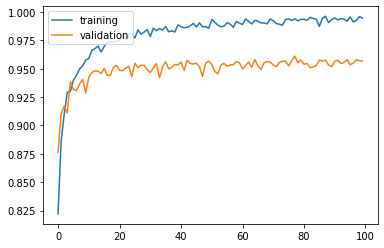

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [144]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 919us/step - loss: 0.2381 - accuracy: 0.95870s - loss: 0.2


In [145]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9586963057518005


In [146]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [63]:
from keras.layers import Dropout

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

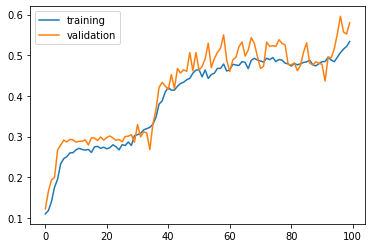

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [67]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 797us/step - loss: 1.1125 - accuracy: 0.5871


In [68]:
print('Test accuracy: ', results[1])

Test accuracy:  0.587115466594696


In [69]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut.csv', header =  ['filename', 'label' ], index = None)

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [91]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [93]:
def mlp_model1():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [94]:
model1 = KerasClassifier(build_fn = mlp_model1, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model2, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model3, epochs = 20, verbose = 0)

In [95]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [96]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [97]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B19C8>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1748>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1788>)],
                 voting='soft')

In [98]:
y_pred = ensemble_clf.predict(x_test)

In [99]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9627474870545233


In [100]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Ensemble.csv', header =  ['filename', 'label' ], index = None)

## Tuning by Learning rate & decaying rate

In [77]:
from keras.layers import BatchNormalization

In [78]:
# solution
epochs = 100
learning_rate = 0.01 # initial learning rate
decay_rate = 0.01
momentum = 0.8

# define the optimizer function
adam = optimizers.Adam(lr=learning_rate)

In [79]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model_initial():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [80]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

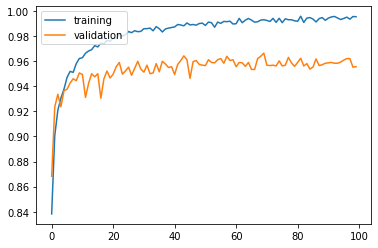

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [82]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1968 - accuracy: 0.9639


In [83]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9639354348182678


In [84]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

#### With Elu & batch - Test accuracy:  0.963965892791748 - AV Accu - 96.7

#### With Elu, batch & Initializer - Test accuracy:  0.9626560807228088 - AV Accu - 96.5

In [88]:
def mlp_model_Initialization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [89]:
for i in ['he_normal','random_normal','truncated_normal']:
    model = mlp_model_Initialization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2077 - accuracy: 0.9634
Test accuracy:  0.9634480476379395
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2505 - accuracy: 0.9568
Test accuracy:  0.9568077921867371


In [96]:
model = mlp_model_Initialization_Test('truncated_normal')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2697 - accuracy: 0.9571
Test accuracy:  0.9571428298950195


In [97]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_TrucNormalInit_100Epo.csv', header =  ['filename', 'label' ], index = None)

In [93]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [98]:
def mlp_model_Initialization_ObjTest(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [101]:
import keras

initList = [keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
,keras.initializers.Ones()
,keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
,keras.initializers.Orthogonal(gain=1.0, seed=None)
,keras.initializers.lecun_uniform(seed=None)
,keras.initializers.glorot_normal(seed=None)
,keras.initializers.glorot_uniform(seed=None)
,keras.initializers.he_normal(seed=None)
,keras.initializers.lecun_normal(seed=None)
,keras.initializers.he_uniform(seed=None)]

In [102]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1843 - accuracy: 0.9547
Test accuracy:  0.9547365307807922
1026/1026 [==============================] - 2s 2ms/step - loss: 0.4724 - accuracy: 0.8742
Test accuracy:  0.8742004036903381
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1759 - accuracy: 0.9555
Test accuracy:  0.9555284976959229
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1861 - accuracy: 0.9528
Test accuracy:  0.9528175592422485
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9580
Test accuracy:  0.9579652547836304
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1953 - accuracy: 0.9512
Test accuracy:  0.9512031674385071
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9580
Test accuracy:  0.9580261707305908
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9521
Test accuracy:  0.952116966

In [103]:
print('Test accuracy with Init:', i.distribution,' is', results[1])

Test accuracy with Init: <tensorflow.python.keras.initializers.initializers_v2.HeUniform object at 0x0000021E87B9BFC8>  is 0.9559853672981262


In [108]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy-Init:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2060 - accuracy: 0.9620
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomUniform object at 0x0000021E87B9B1C8>  is 0.9620164632797241
1026/1026 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.9219
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.Ones object at 0x0000021E87B9B848>  is 0.921870231628418
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.9611
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomNormal object at 0x0000021E87B9B888>  is 0.9610722064971924
1026/1026 [==============================] - 1s 938us/step - loss: 0.2251 - accuracy: 0.9634
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x0000021E87B9BDC8>  is 0.9634480476379395
1026/1026 [==============================] - 1s 941us/step - loss: 0.2090 - accuracy: 0.9623
Accura

## Tune Optimizers

In [19]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False,    name='SGD')
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False,
    name='SGD-Momentum')
opts = [adam, sgd, momentum]

In [20]:
def mlp_model_Optimization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = i, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
for i in opts:
    model = mlp_model_Optimization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2053 - accuracy: 0.9642
Accuracy with: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000286A0AD2BC8>  is 0.9641790986061096
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1720 - accuracy: 0.9579
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x00000286A0AD2AC8>  is 0.9578738808631897


KeyboardInterrupt: 

In [ ]:
    model = mlp_model_Optimization_Test(opts[0])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

In [17]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerAdam.csv', header =  ['filename', 'label' ], index = None)

NameError: name 'model' is not defined

In [ ]:
    model = mlp_model_Optimization_Test(opts[1])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

In [127]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerSGD.csv', header =  ['filename', 'label' ], index = None)

In [128]:
    model = mlp_model_Optimization_Test(opts[2])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9640
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9639963507652283


In [129]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerMomentum.csv', header =  ['filename', 'label' ], index = None)

## Result:
    1026/1026 [==============================] - 2s 2ms/step - loss: 0.2053 - accuracy: 0.9642
    Accuracy with: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000286A0AD2BC8>  is 0.9641790986061096
    
### Optimizer Used:
    adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

## Tune Activation

In [130]:
def mlp_model_Activation_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam')
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
ActList = ['relu']

In [132]:
model = mlp_model_Activation_Test('selu')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9628
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.962838888168335


## Tune with Layer size

In [35]:
def mlp_model_LayerSize():
    model = Sequential()
    
    model.add(Dense(300, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(200, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(100, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(20, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name='Adam')
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model_LayerSize()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 1)

results = model.evaluate(x_test, y_test)

print('Accuracy', results[1])

Epoch 1/100
405/405 [==============================] - 3s 9ms/step - loss: 0.5136 - accuracy: 0.8419 - val_loss: 0.3575 - val_accuracy: 0.8964
Epoch 2/100
405/405 [==============================] - 3s 7ms/step - loss: 0.3130 - accuracy: 0.9037 - val_loss: 0.2838 - val_accuracy: 0.9150
Epoch 3/100
405/405 [==============================] - 3s 7ms/step - loss: 0.2326 - accuracy: 0.9286 - val_loss: 0.2055 - val_accuracy: 0.9385
Epoch 4/100
405/405 [==============================] - 3s 7ms/step - loss: 0.1874 - accuracy: 0.9429 - val_loss: 0.1925 - val_accuracy: 0.9416
Epoch 5/100
405/405 [==============================] - 3s 8ms/step - loss: 0.1510 - accuracy: 0.9512 - val_loss: 0.3117 - val_accuracy: 0.9224
Epoch 6/100
405/405 [==============================] - 3s 8ms/step - loss: 0.1170 - accuracy: 0.9625 - val_loss: 0.1686 - val_accuracy: 0.9518
Epoch 7/100
405/405 [==============================] - 3s 7ms/step - loss: 0.1076 - accuracy: 0.9636 - val_loss: 0.1940 - val_accuracy: 0.9459

Epoch 58/100
405/405 [==============================] - 3s 8ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.1707 - val_accuracy: 0.9632
Epoch 59/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.1637 - val_accuracy: 0.9672
Epoch 60/100
405/405 [==============================] - 3s 8ms/step - loss: 0.0067 - accuracy: 0.9971 - val_loss: 0.1572 - val_accuracy: 0.9706
Epoch 61/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.1670 - val_accuracy: 0.9694
Epoch 62/100
405/405 [==============================] - 3s 8ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.1709 - val_accuracy: 0.9629
Epoch 63/100
405/405 [==============================] - 3s 7ms/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.1778 - val_accuracy: 0.9644
Epoch 64/100
405/405 [==============================] - 3s 8ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.1813 - val_accuracy:

In [37]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Digit_TuningNetworkSize_100Epo.csv', header =  ['filename', 'label' ], index = None)